<a href="https://colab.research.google.com/github/Suharsh007/Pandas_Case_Study/blob/main/Chitpole_Data_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Knowing the Data**

Importing Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

Load the Dataset

In [76]:
df = pd.read_csv('/chipotle.tsv',sep = '\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


What is the number of observations in the dataset?

In [77]:
df.shape[0]

4622

What is the number of columns in the dataset?

In [78]:
df.shape[1]

5

Print the name of all the columns.

In [79]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

How is the dataset indexed?

In [80]:
df.index

RangeIndex(start=0, stop=4622, step=1)

Which was the most-ordered item?

In [81]:
c = df.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

<ipython-input-81-04a3ab1ee002>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c = c.sum()


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


What was the most ordered item in the choice_description column?

In [82]:
c = df.groupby('choice_description')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

<ipython-input-82-804769bafc01>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c = c.sum()


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


How many items were orderd in total?

In [83]:
df['quantity'].sum()

4972

Turn the item price into a float

In [84]:
df['item_price'].dtype

dtype('O')

In [85]:
funct = lambda x: float(x[1:-1])
df['item_price'] = df['item_price'].apply(funct)

In [86]:
df['item_price'].dtype

dtype('float64')

How much was the revenue for the period in the dataset?

In [87]:
df['total_sale'] = df['item_price']*df['quantity']
t_sum=df['total_sale'].sum()
t_sum

39237.02

How many orders were made in the period?

In [88]:
total_orders = df['order_id'].nunique()
total_orders

1834

What is the average revenue amount per order?

In [89]:
order_grouped = df.groupby(by=['order_id']).sum()
order_grouped.mean()['total_sale']

<ipython-input-89-076fede293fc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_grouped = df.groupby(by=['order_id']).sum()


21.39423118865867

How many different items are sold?

In [90]:
diff_items = df['item_name'].nunique()
diff_items

50

# **Filtering and Sorting Data**

How many products cost more than $10.00?

In [91]:
df_filtered = df.drop_duplicates(['item_name','quantity','choice_description'])
df_filtered.shape

(1949, 6)

In [92]:
df_atleast_one_product = df_filtered[df_filtered['quantity']>=1]
df_atleast_one_product.shape

(1949, 6)

In [93]:
df[df['item_price']>10.00].item_name.nunique()

31

What is the price of each item?

In [94]:
res =df.groupby('item_name')['item_price'].max()
res

item_name
6 Pack Soft Drink                        12.98
Barbacoa Bowl                            11.75
Barbacoa Burrito                         11.75
Barbacoa Crispy Tacos                    18.50
Barbacoa Salad Bowl                      11.89
Barbacoa Soft Tacos                      11.75
Bottled Water                            15.00
Bowl                                     22.20
Burrito                                   7.40
Canned Soda                               4.36
Canned Soft Drink                         5.00
Carnitas Bowl                            35.25
Carnitas Burrito                         18.50
Carnitas Crispy Tacos                    17.98
Carnitas Salad                            8.99
Carnitas Salad Bowl                      11.89
Carnitas Soft Tacos                      11.75
Chicken Bowl                             32.94
Chicken Burrito                          35.00
Chicken Crispy Tacos                     17.50
Chicken Salad                            10.98
Chi

Sort by the name of the item

In [95]:
df.sort_values('item_name')

,order_id,quantity,item_name,choice_description,item_price,total_sale
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,25.96
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49
...,...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75,8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49,8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25


## **Visualisation**

Create a histogram of the top 5 items bought

In [117]:
# get the Series of the names
x = df.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
counts = Counter(x)
data_frame = pd.DataFrame.from_dict(counts,orient="index")
data_frame.head()

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


In [125]:
data_frame_sorted = data_frame.sort_values(0,ascending=False)[0:5]
data_frame_sorted

,0
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


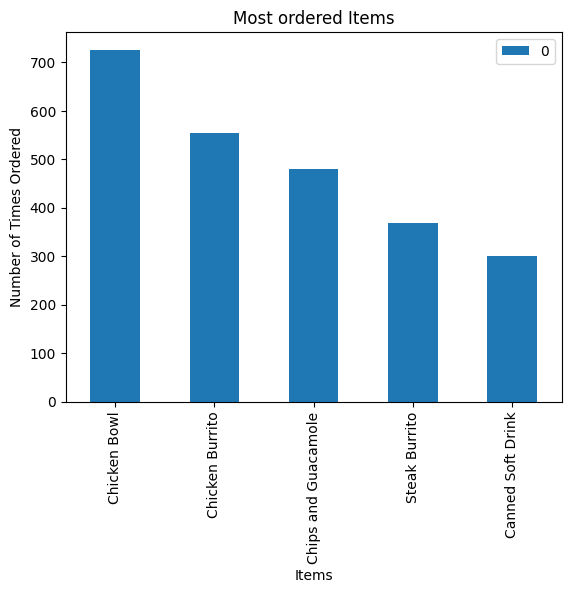

In [127]:
data_frame_sorted.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Items')

# show the plot
plt.show()

Create a scatterplot with the number of items orderered per order price

          quantity  item_price  total_sale
order_id                                  
1                4       11.56       11.56
2                2       16.98       33.96
3                2       12.67       12.67
4                2       21.00       21.00
5                2       13.70       13.70


<ipython-input-136-14e8ca4c5d25>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = df.groupby('order_id').sum()


<Axes: xlabel='item_price', ylabel='quantity'>

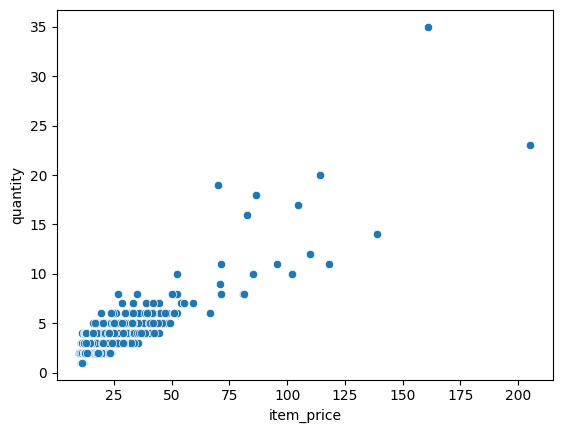

In [136]:
orders = df.groupby('order_id').sum()
print(orders.head())
sns.scatterplot(y=orders.quantity,x=orders.item_price)